Monday - Constructing SQL Relational Database

Set up a SQL relational database. 
We want you to use the information in both the 'credit_info.csv' and 'customer_info.csv' to create a relational database using SQL. 'ID' is a unique value (or at least it should be). Your database must contain 4 different tables.

One with the customer demographic info (including if they defaulted or not)

One with user's Payment Status History (PAY_STAT_XXX).

One with user's Bill Amount history (BILL_AMT_XXX).

One with user's Payment amount history (BILL_PAY_XXX)

You can use PostGres, SQLite or any other SQL system you are familiar with. Include a written copy of the Data structure and all Keys (Primary and Secondary)

In [2]:
import pandas as pd
import sqlite3
from pandas.io import sql

In [3]:
#making the datasets into df

credit = pd.read_csv('credit_info.csv', encoding = 'utf-8')
cust = pd.read_csv('customer_info.csv', encoding = 'utf-8')

#orders = pd.read_csv('data/csv/EuroMart-ListOfOrders.csv', encoding = 'utf-8')
#OBD =  pd.read_csv('data/csv/EuroMart-OrderBreakdown.csv', encoding = 'utf-8')
#sales_targets =  pd.read_csv('data/csv/EuroMart-SalesTargets.csv', encoding = 'utf-8')


In [4]:
cust.head(3)

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month
0,0,1,20000,2,2.0,1,24,1
1,1,2,120000,2,2.0,2,26,1
2,2,3,90000,2,2.0,2,34,0


In [5]:
cust.shape

(30000, 8)

In [6]:
credit.head(3)

,Unnamed: 0,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,BILL_AMT_SEP,BILL_AMT_AUG,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR,default payment next month
0,0,1,2,2,-1,-1,-2,-2,3913,3102.0,...,0,0,0,0,689,0,0,0,0,1
1,1,2,-1,2,0,0,0,2,2682,1725.0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,0,0,0,0,0,0,29239,14027.0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [7]:
credit.shape


(30000, 21)

In [9]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null int64
PAY_STAT_SEP                  30000 non-null int64
PAY_STAT_AUG                  30000 non-null int64
PAY_STAT_JUL                  30000 non-null int64
PAY_STAT_JUN                  30000 non-null int64
PAY_STAT_MAY                  30000 non-null int64
PAY_STAT_APR                  30000 non-null int64
BILL_AMT_SEP                  30000 non-null int64
BILL_AMT_AUG                  27457 non-null float64
BILL_AMT_JUL                  30000 non-null int64
BILL_AMT_JUN                  30000 non-null int64
BILL_AMT_MAY                  30000 non-null int64
BILL_AMT_APR                  30000 non-null int64
BILL_PAY_SEP                  30000 non-null int64
BILL_PAY_AUG                  30000 non-null int64
BILL_PAY_JUL                  30000 non-null int64
BILL_PAY_JUN          

In [10]:
list(credit)

['Unnamed: 0',
 u'ID',
 u'PAY_STAT_SEP',
 u'PAY_STAT_AUG',
 u'PAY_STAT_JUL',
 u'PAY_STAT_JUN',
 u'PAY_STAT_MAY',
 u'PAY_STAT_APR',
 u'BILL_AMT_SEP',
 u'BILL_AMT_AUG',
 u'BILL_AMT_JUL',
 u'BILL_AMT_JUN',
 u'BILL_AMT_MAY',
 u'BILL_AMT_APR',
 u'BILL_PAY_SEP',
 u'BILL_PAY_AUG',
 u'BILL_PAY_JUL',
 u'BILL_PAY_JUN',
 u'BILL_PAY_MAY',
 u'BILL_PAY_APR',
 u'default payment next month']

In [11]:
dfpaystat = credit.drop(['BILL_AMT_SEP',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR',
 'BILL_PAY_SEP',
 'BILL_PAY_AUG',
 'BILL_PAY_JUL',
 'BILL_PAY_JUN',
 'BILL_PAY_MAY',
 'BILL_PAY_APR'], axis=1)
## sample code from df.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)
## removed inplace=True because it was dropping the columns from original credit df as well.

In [12]:
dfpaystat.head(3)

,Unnamed: 0,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,default payment next month
0,0,1,2,2,-1,-1,-2,-2,1
1,1,2,-1,2,0,0,0,2,1
2,2,3,0,0,0,0,0,0,0


In [13]:
credit.columns

Index([                u'Unnamed: 0',                         u'ID',
                     u'PAY_STAT_SEP',               u'PAY_STAT_AUG',
                     u'PAY_STAT_JUL',               u'PAY_STAT_JUN',
                     u'PAY_STAT_MAY',               u'PAY_STAT_APR',
                     u'BILL_AMT_SEP',               u'BILL_AMT_AUG',
                     u'BILL_AMT_JUL',               u'BILL_AMT_JUN',
                     u'BILL_AMT_MAY',               u'BILL_AMT_APR',
                     u'BILL_PAY_SEP',               u'BILL_PAY_AUG',
                     u'BILL_PAY_JUL',               u'BILL_PAY_JUN',
                     u'BILL_PAY_MAY',               u'BILL_PAY_APR',
       u'default payment next month'],
      dtype='object')

In [14]:
dfbillamt = credit.drop(['PAY_STAT_SEP',
 'PAY_STAT_AUG',
 'PAY_STAT_JUL',
 'PAY_STAT_JUN',
 'PAY_STAT_MAY',
 'PAY_STAT_APR', 
 'BILL_PAY_SEP',
 'BILL_PAY_AUG',
 'BILL_PAY_JUL',
 'BILL_PAY_JUN',
 'BILL_PAY_MAY',
 'BILL_PAY_APR'], axis=1)

In [15]:
dfbillamt.head(3)

,Unnamed: 0,ID,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,default payment next month
0,0,1,3913,3102.0,689,0,0,0,1
1,1,2,2682,1725.0,2682,3272,3455,3261,1
2,2,3,29239,14027.0,13559,14331,14948,15549,0


In [16]:
dfbillpay = credit.drop(['PAY_STAT_AUG',
 'PAY_STAT_SEP',
 'PAY_STAT_JUL',
 'PAY_STAT_JUN',
 'PAY_STAT_MAY',
 'PAY_STAT_APR',
 'BILL_AMT_SEP',
 'BILL_AMT_AUG',
 'BILL_AMT_JUL',
 'BILL_AMT_JUN',
 'BILL_AMT_MAY',
 'BILL_AMT_APR'], axis=1)
## sample code from df.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)
## removed inplace=True because it was dropping the columns from original credit df as well.

In [17]:
dfbillpay.head(3)

,Unnamed: 0,ID,BILL_PAY_SEP,BILL_PAY_AUG,BILL_PAY_JUL,BILL_PAY_JUN,BILL_PAY_MAY,BILL_PAY_APR,default payment next month
0,0,1,0,689,0,0,0,0,1
1,1,2,0,1000,1000,1000,0,2000,1
2,2,3,1518,1500,1000,1000,1000,5000,0


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

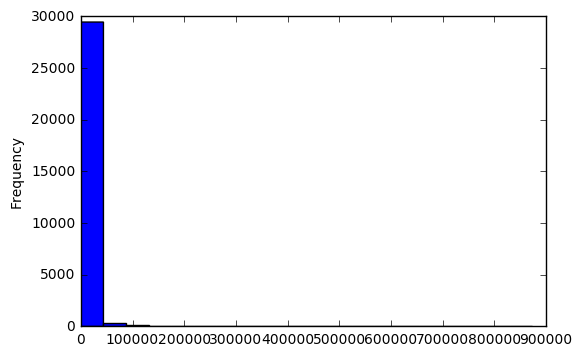

In [20]:
dfbillpay.BILL_PAY_SEP.plot(kind='hist', bins=20)

In [21]:
## allDF.groupby('weight').mean()


## dfbillpay.groupby('BILL_PAY_SEP').mean()

In [22]:
# Establishing the Connection to our Database.  If no database exists here, this will create one.
#credit = pd.read_csv('credit_info.csv', encoding = 'utf-8')
#cust = pd.read_csv('customer_info.csv', encoding = 'utf-8')
#conn = sqlite3.connect(sqlite_db)

#c = conn.cursor()

#conn = sqlite3.connect(cust)
#c = conn.cursor()


#connection = sqlite3.connect('data/Cust.db.sqlite')
#connection = sqlite3.connect('data/credit.db.sqlite')

#connection = sqlite3.connect('customer_info/sql/Cust.db.sqlite')

#cars = pd.read_csv('data/csv/car-names.csv', encoding = 'utf-8')
connection = sqlite3.connect('data/sql/cust.db.sqlite')

# Establishing Local DB connection
#db_connection = sqlite3.connect('data/sql/Cust.db.sqlite')
#db_connection = sqlite3.connect('data/sql/credit.db.sqlite')

## connecting to a db
## sqlite3 <filename>

## %load_ext sql
#db_connection = sqlite3.connect('data/sql/CustomerImfo.db.sqlite')

# # Reading out DataFrames as SQL Table
#credit.to_sql(name = 'credit', con = db_connection, if_exists = 'replace', index = False)
#cust.to_sql(name = 'cust', con = db_connection, if_exists = 'replace', index = False)
#OBD.to_sql(name = 'order_breakdown', con = db_connection, if_exists = 'replace', index = False)
#sales_targets.to_sql(name = 'sales_targets', con = db_connection, if_exists = 'replace', index = False)


## cars.to_sql(name = 'car_names', con = connection, if_exists = 'replace', index = False)


OperationalError: unable to open database file

In [23]:
# Converting the customers df into a SQL database

# Establishing Local DB connection
# db_connection = sqlite3.connect('data/sql/EuroMart.db.sqlite')
connection = sqlite3.connect('data/sql/cust.db.sqlite')

cust.to_sql(name = 'cust', con = connection, if_exists = 'replace', index = False)


OperationalError: unable to open database file

In [166]:
# Converting the dfpaystat into a SQL database

dfpaystat.to_sql(name = 'paystatus', con = connection, if_exists = 'replace', index = False)


In [167]:
# Converting the dfbillamt into a SQL database

dfbillamt.to_sql(name = 'billamt', con = connection, if_exists = 'replace', index = False)

In [193]:
## #connection = sqlite3.connect('customer_info/sql/Cust.db.sqlite')


connection = sqlite3.connect('data/paystatus.db.sqlite')

In [225]:
db_connection = sqlite3.connect('data/Cust.db.sqlite')
#db_connection = sqlite3.connect('data/sql/credit.db.sqlite')
## create the correct path to the 
## Sam helped me type up the correct path to the sql db in my notebook. Thank you so much Sam!!


In [226]:
x = sql.read_sql('SELECT BILL_AMT_SEP FROM billamt', con = db_connection).head()
##sql.read_sql('SELECT city, country, region, state FROM orders', con = db_connection).head()

In [227]:
# Converting the dfbillpay into a SQL database

dfbillpay.to_sql(name = 'billpay', con = connection, if_exists = 'replace', index = False)

## orders.to_sql(name = 'orders', con = db_connection, if_exists = 'replace', index = False)


Tuesday - Database Querying and EDA

Identify and interpret summary statistics.

Mean, Median, Mode

Moving Averages and changes

Distributions

Handle missing values and justify your rational.

Evaluate features for importance.

Use visualizations (Tableau or Python plotting) to show a few of your findings.

Bonus - Engineer a Feature

Super-Bonus Determine the relative importance of your engineered feature.
There is now a Data Dictionary in the 'Data' folder.

Please add your notebook with your name to this 'Week 11 Code Challenge' folder and push it today.

In [171]:
dfpaystat.head(4)

,Unnamed: 0,ID,PAY_STAT_SEP,PAY_STAT_AUG,PAY_STAT_JUL,PAY_STAT_JUN,PAY_STAT_MAY,PAY_STAT_APR,default payment next month
0,0,1,2,2,-1,-1,-2,-2,1
1,1,2,-1,2,0,0,0,2,1
2,2,3,0,0,0,0,0,0,0
3,3,4,0,0,0,0,0,0,0


In [172]:
### Getting all customer names and setting them to a pandas object
## customers = sql.read_sql('SELECT customer_name FROM orders', con = db_connection)

# counting unique values in the list
## customers['customer_name'].value_counts().head()

billamt.head()

## orders.to_sql(name = 'orders', con = db_connection, if_exists = 'replace', index = False)


NameError: name 'billamt' is not defined

In [ ]:
## Still problem solving why my 3 sql databases are not defined

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
#drinks.beer.plt(kind='hist', bins=3)

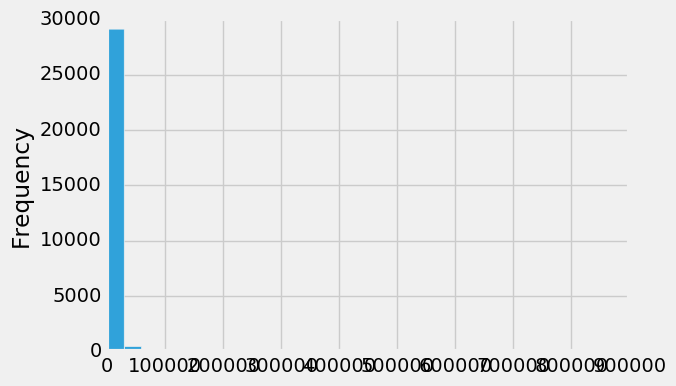

In [197]:
dfbillpay.BILL_PAY_SEP.plot(kind='hist', bins=30)